In [7]:
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras import regularizers
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import SGD, RMSprop, Adadelta, Adam, Nadam
import matplotlib.pyplot as plt
(x_train, _), (x_test, _)= mnist.load_data()
x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
def plot_hist(h, xsize=6, ysize=10):
    meas = h.keys()
    
    fig_size = plt.rcParams['figure.figsize']
    plt.rcParams['figure.figsize'] = [xsize, ysize]
    
    meas_list = []
    for m in meas:
        plt.plot(h[m])
        meas_list.append(m)
        
    
    y_lab = ','
    plt.ylabel(ylab.join(meas_list))
    plt.xlabel('epoch')
    plt.legend(meas_list, loc='upper left')
    plt.show()
    return

def plot_image(x_test, decoded_imgs):
    n = 10
    plt.figure(figsize=(20, 4))
    
    for i in range(n):
        ax = plt.subplot(2, n, i+1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
        ax = plt.subplot(2, n, i+1+n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
        
    plt.show()
    return

In [8]:
input_img = Input(shape=(784, ))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)
decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='relu')(decoded)
deep_autoencoder = Model(input_img, decoded)
deep_autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_12 (Dense)            (None, 128)               100480    
                                                                 
 dense_13 (Dense)            (None, 64)                8256      
                                                                 
 dense_14 (Dense)            (None, 32)                2080      
                                                                 
 dense_15 (Dense)            (None, 64)                2112      
                                                                 
 dense_16 (Dense)            (None, 128)               8320      
                                                                 
 dense_17 (Dense)            (None, 784)               1011

In [9]:
callbacks = [TensorBoard(log_dir='/tmp/autoencoder/deep-1', histogram_freq=1, write_graph=True, write_images=True,
                        embeddings_freq=0,embeddings_layer_names=None, embeddings_metadata=None, profile_batch=100000000),
            EarlyStopping(monitor='val_loss', patience=30, verbose=0)]

opt_adadelta_1 = Adadelta(lr=0.001, rho=0.95, epsilon=1e-07)
deep_autoencoder.compile(optimizer=opt_adadelta_1, loss='binary_crossentropy')
hist = deep_autoencoder.fit(x_train, x_train,
                           epochs=300, 
                           batch_size=256,
                           shuffle=True,
                           validation_data=(x_test, x_test),
                           callbacks=callbacks)


Epoch 1/300
235/235 [==============================] - 3s 8ms/step - loss: 1.2719 - val_loss: 1.2847
Epoch 2/300
235/235 [==============================] - 2s 7ms/step - loss: 1.2624 - val_loss: 1.2763
Epoch 3/300
235/235 [==============================] - 2s 8ms/step - loss: 1.2538 - val_loss: 1.2675
Epoch 4/300
235/235 [==============================] - 2s 8ms/step - loss: 1.2455 - val_loss: 1.2591
Epoch 5/300
235/235 [==============================] - 2s 8ms/step - loss: 1.2373 - val_loss: 1.2506
Epoch 6/300
235/235 [==============================] - 2s 8ms/step - loss: 1.2290 - val_loss: 1.2428
Epoch 7/300
235/235 [==============================] - 2s 8ms/step - loss: 1.2211 - val_loss: 1.2343
Epoch 8/300
235/235 [==============================] - 2s 7ms/step - loss: 1.2128 - val_loss: 1.2262
Epoch 9/300
235/235 [==============================] - 2s 7ms/step - loss: 1.2050 - val_loss: 1.2184
Epoch 10/300
235/235 [==============================] - 2s 8ms/step - loss: 1.1970 - val_lo

235/235 [==============================] - 2s 7ms/step - loss: 0.7812 - val_loss: 0.7887
Epoch 82/300
235/235 [==============================] - 2s 9ms/step - loss: 0.7774 - val_loss: 0.7844
Epoch 83/300
235/235 [==============================] - 2s 9ms/step - loss: 0.7733 - val_loss: 0.7805
Epoch 84/300
235/235 [==============================] - 2s 7ms/step - loss: 0.7695 - val_loss: 0.7766
Epoch 85/300
235/235 [==============================] - 2s 8ms/step - loss: 0.7655 - val_loss: 0.7725
Epoch 86/300
235/235 [==============================] - 2s 8ms/step - loss: 0.7618 - val_loss: 0.7689
Epoch 87/300
235/235 [==============================] - 2s 7ms/step - loss: 0.7582 - val_loss: 0.7649
Epoch 88/300
235/235 [==============================] - 2s 7ms/step - loss: 0.7544 - val_loss: 0.7614
Epoch 89/300
235/235 [==============================] - 2s 7ms/step - loss: 0.7509 - val_loss: 0.7579
Epoch 90/300
235/235 [==============================] - 2s 8ms/step - loss: 0.7474 - val_loss: 

Epoch 161/300
235/235 [==============================] - 2s 9ms/step - loss: 0.6150 - val_loss: 0.6203
Epoch 162/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6141 - val_loss: 0.6193
Epoch 163/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6132 - val_loss: 0.6185
Epoch 164/300
235/235 [==============================] - 2s 7ms/step - loss: 0.6123 - val_loss: 0.6175
Epoch 165/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6114 - val_loss: 0.6165
Epoch 166/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6105 - val_loss: 0.6156
Epoch 167/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6096 - val_loss: 0.6146
Epoch 168/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6086 - val_loss: 0.6138
Epoch 169/300
235/235 [==============================] - 2s 8ms/step - loss: 0.6079 - val_loss: 0.6132
Epoch 170/300
235/235 [==============================] - 2s 9ms/step - lo

235/235 [==============================] - 2s 8ms/step - loss: 0.5893 - val_loss: 0.5946
Epoch 241/300
235/235 [==============================] - 2s 7ms/step - loss: 0.5892 - val_loss: 0.5945
Epoch 242/300
235/235 [==============================] - 2s 7ms/step - loss: 0.5892 - val_loss: 0.5944
Epoch 243/300
235/235 [==============================] - 2s 7ms/step - loss: 0.5891 - val_loss: 0.5943
Epoch 244/300
235/235 [==============================] - 2s 8ms/step - loss: 0.5890 - val_loss: 0.5943
Epoch 245/300
235/235 [==============================] - 2s 8ms/step - loss: 0.5889 - val_loss: 0.5942
Epoch 246/300
235/235 [==============================] - 2s 8ms/step - loss: 0.5889 - val_loss: 0.5941
Epoch 247/300
235/235 [==============================] - 2s 9ms/step - loss: 0.5888 - val_loss: 0.5941
Epoch 248/300
235/235 [==============================] - 2s 8ms/step - loss: 0.5887 - val_loss: 0.5940
Epoch 249/300
235/235 [==============================] - 2s 7ms/step - loss: 0.5887 - v

NameError: name 'ylab' is not defined

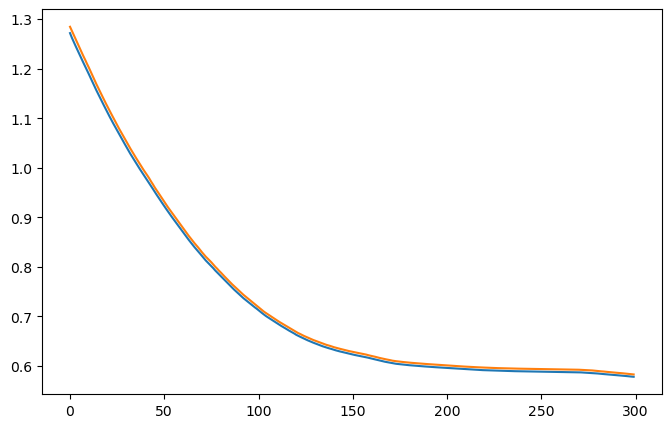

In [10]:
plot_hist(hist.history, xsize=8, ysize=5)

In [12]:
from tensorflow.keras.utils import to_categorical

img_rows = 28
img_cols = 28
img_ch = 1

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, img_ch)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, img_ch)

input_shape = (img_rows, img_cols, img_ch)

print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [15]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.layers import UpSampling2D, BatchNormalization, LeakyReLU

input_img = Input(shape=input_shape)

x = Conv2D(16, (3, 3), padding='same')(input_img)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(8, (3, 3), padding='same')(encoded)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(8, (3, 3), padding='same')(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
x = UpSampling2D((2, 2))(x)

x = Conv2D(16, (3, 3))(x)
x = BatchNormalization()(x)
x = LeakyReLU(alpha=0.001)(x)
x = UpSampling2D((2,2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

convol_autoencoder = Model(input_img, decoded)
convol_autoencoder.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 batch_normalization_9 (Batc  (None, 28, 28, 16)       64        
 hNormalization)                                                 
                                                                 
 leaky_re_lu_9 (LeakyReLU)   (None, 28, 28, 16)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 8)         1160

In [18]:
callbacks = [TensorBoard(log_dir='/tmp/autoencoder/deep-4', histogram_freq=1, write_graph=True, write_images=True,
                        embeddings_freq=0, embeddings_layer_names=None, embeddings_metadata=None, profile_batch = 100000000), EarlyStopping(monitor='val_loss', patience=30, verbose=0)]
opt_nadam = Nadam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-07)
convol_autoencoder.compile(optimizer=opt_nadam, loss='binary_crossentropy')
hist = convol_autoencoder.fit(x_train, x_train,
                             epochs=200, batch_size=128,
                             shuffle=True, validation_data=(x_test, x_test),
                             callbacks=callbacks)

Epoch 1/200
469/469 [==============================] - 46s 89ms/step - loss: 0.0884 - val_loss: 0.0914
Epoch 2/200
469/469 [==============================] - 41s 86ms/step - loss: 0.0881 - val_loss: 0.0886
Epoch 3/200
469/469 [==============================] - 40s 85ms/step - loss: 0.0878 - val_loss: 0.0891
Epoch 4/200
469/469 [==============================] - 41s 87ms/step - loss: 0.0876 - val_loss: 0.0884
Epoch 5/200
469/469 [==============================] - 39s 83ms/step - loss: 0.0873 - val_loss: 0.0880
Epoch 6/200
469/469 [==============================] - 39s 83ms/step - loss: 0.0871 - val_loss: 0.0882
Epoch 7/200
469/469 [==============================] - 39s 82ms/step - loss: 0.0869 - val_loss: 0.0880
Epoch 8/200
469/469 [==============================] - 39s 83ms/step - loss: 0.0867 - val_loss: 0.0858
Epoch 9/200
469/469 [==============================] - 38s 80ms/step - loss: 0.0865 - val_loss: 0.0883
Epoch 10/200
469/469 [==============================] - 38s 82ms/step - l

469/469 [==============================] - 3344s 7s/step - loss: 0.0825 - val_loss: 0.0816
Epoch 80/200
469/469 [==============================] - 4722s 10s/step - loss: 0.0824 - val_loss: 0.0831
Epoch 81/200
469/469 [==============================] - 40s 86ms/step - loss: 0.0824 - val_loss: 0.0822
Epoch 82/200
469/469 [==============================] - 42s 89ms/step - loss: 0.0824 - val_loss: 0.0819
Epoch 83/200
469/469 [==============================] - 40s 85ms/step - loss: 0.0824 - val_loss: 0.0824
Epoch 84/200
469/469 [==============================] - 41s 87ms/step - loss: 0.0824 - val_loss: 0.0817
Epoch 85/200
469/469 [==============================] - 44s 94ms/step - loss: 0.0823 - val_loss: 0.0838
Epoch 86/200
469/469 [==============================] - 42s 89ms/step - loss: 0.0823 - val_loss: 0.0833
Epoch 87/200
469/469 [==============================] - 39s 83ms/step - loss: 0.0823 - val_loss: 0.0835
Epoch 88/200
469/469 [==============================] - 41s 88ms/step - loss

469/469 [==============================] - 41s 88ms/step - loss: 0.0814 - val_loss: 0.0837
Epoch 158/200
469/469 [==============================] - 40s 86ms/step - loss: 0.0813 - val_loss: 0.0817
Epoch 159/200
469/469 [==============================] - 39s 82ms/step - loss: 0.0814 - val_loss: 0.0816
Epoch 160/200
469/469 [==============================] - 38s 81ms/step - loss: 0.0813 - val_loss: 0.0808
Epoch 161/200
469/469 [==============================] - 38s 82ms/step - loss: 0.0813 - val_loss: 0.0822
Epoch 162/200
469/469 [==============================] - 39s 82ms/step - loss: 0.0813 - val_loss: 0.0810
Epoch 163/200
469/469 [==============================] - 38s 82ms/step - loss: 0.0813 - val_loss: 0.0813
Epoch 164/200
469/469 [==============================] - 38s 82ms/step - loss: 0.0813 - val_loss: 0.0809
Epoch 165/200
469/469 [==============================] - 38s 81ms/step - loss: 0.0813 - val_loss: 0.0807
Epoch 166/200
469/469 [==============================] - 38s 82ms/ste

NameError: name 'ylab' is not defined

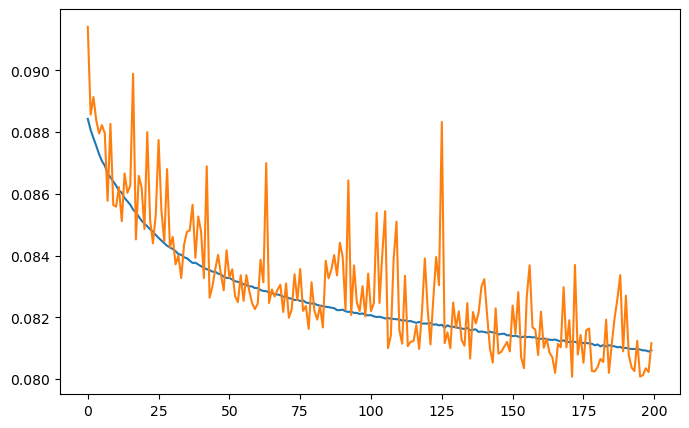

In [19]:
plot_hist(hist.history, xsize=8, ysize=5)

In [ ]:
decoded_imgs = convol_autoencoder.predict(x_test)
plot_image(x_test, deocded_imgs)

In [ ]:
#卷积神经网络识别带有噪声的mnist数据集
noise_factor = 0.5
x_train_noisy = x_train + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)
x_test_noisy = x_test + noise_factor*np.random.normal(loc=0.0, scale=1.0, size=x_test.shape)

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [ ]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i+1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
plt.show()


In [ ]:
decoded_noisy_imgs = convol_autoencoder.predict(x_test_noisy)
plot_image(x_test_noisy, decoded_noisy_imgs)

In [ ]:
#从上述结果图可以看出对于有噪声的测试集与预测结果对比，可以看出对于有噪声的图像，效果会不容乐观
#拓展用于特征检测的滤波器的数量并在噪声数据上重新训练卷积神经网络可以让他们从噪声图像中重建测试数据
input_img = Input(shape=input_shape)
x = Conv2D(32, (3, 3), padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

x = Conv2D(32, (3, 3), padding='same')(encoded)
x = UpSampling2D((2, 2))(x)

x = Conv2D(32, (3, 3), padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.summary()

In [ ]:
callbacks=[EarlyStopping(monitor='val_loss', patience=20, verbose=0)]

opt_rmsprop = RMSprop(lr=0.005, rho=0.95, momentum=0.01，epsilon=1e-07)
autoencoder.fit(x_train_noisy, x_train,
               epochs=100, 
               batch_size=128,
               shuffle=True,
               validation_data=(x_test_nosiy, x_test),
               callbacks=callbacks)


In [ ]:
plot_hist(hist.history, xsize=8, ysize=5)

In [ ]:
decoded_noisy_imgs = autoencoder.predict(x_test_noisy)
plot_images(x_test[0:10], cols=5, xsize=12, ysize=5)

In [ ]:
plot_images(x_test_noisy[0:10], cols=5, xsize=12, ysize=5)
